In [3]:
import pandas as pd
import numpy as np

# df = pd.read_excel(r'C:\Users\iUsaid\Desktop\DSP-55 for Python\Project on ML\Online Retail.xlsx')
# df

In [7]:
f_path = r'C:\Users\iUsaid\Desktop\DSP-55 for Python\Project on ML'
fine_name = r'\Online Retail.xlsx'

df = pd.read_excel(f_path+fine_name)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# investing the Null customer Id
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [11]:
df.shape

(541909, 8)

In [13]:
# sorting by quantity
df[df['CustomerID'].isnull()].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom


As the sorting result display -ve values in quantity which indicates that this might be return orders

Not necessary that return can only be applicable where CustomerId is null so now we have tow aspect to check -ve value 
where id is null as well as it is not null.

# Lets find out the return orders where the customer_id is null

In [16]:
null_customers_df = df[df['CustomerID'].isnull()]

null_id_orders = null_customers_df[null_customers_df['Quantity']<0].InvoiceNo.nunique()

print('Total return orders where the customer_id is null: ', null_id_orders)

Total return orders where the customer_id is null:  1518


# Lets find out total return orders

In [18]:
total_return = df[df['Quantity']<0].InvoiceNo.nunique()

print('Total number of return orders :', total_return)

Total number of return orders : 5172


# Lets see the order count country wise

In [19]:
import matplotlib.pyplot as plt

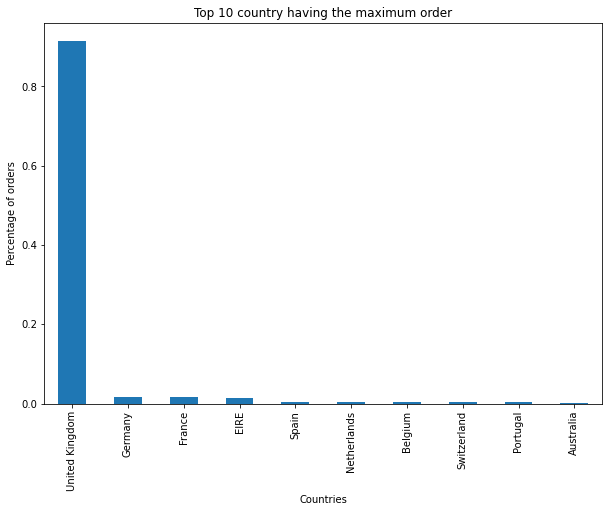

In [24]:
plt.figure(figsize=(10,7))
df['Country'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Percentage of orders')
plt.title('Top 10 country having the maximum order')
plt.show()

Form this we can conclude that more than 90% orders from UKm

In [26]:
# Restricting the Data only for UK

df = df[df['Country'] == 'United Kingdom']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [27]:
# Restricting the Data where quantity > 0
df = df[df['Quantity']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [28]:
# Convert the data into DateTime Object. Print the max and min date.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/741853403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [30]:
df['Month'] = df['InvoiceDate'].dt.month
df

C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/2539873930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12


In [32]:
df['Year'] = df['InvoiceDate'].dt.year
df

C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/1173302694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011


In [34]:
# COnverting from integers to string

df['Month'] = df['Month'].astype('str')
df['Year'] = df['Year'].astype('str')

df['Month-Year_wise'] = df['Month']+"-"+df['Year']
df

C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/371409465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('str')
C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/371409465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('str')
C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/371409465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month-Year_wise
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010
...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,12-2011
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,12-2011
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011,12-2011
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011,12-2011


Drop record where CustomerID is null

Drop record where Unitprice is less than 0

create a revenue field(Revenue = Quantity * Unit Price)

In [37]:
df =df[df['CustomerID'].notnull()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month-Year_wise,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,12-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,12-2011,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,12-2011,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011,12-2011,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011,12-2011,214.80


In [38]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month-Year_wise,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,12-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12-2010,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,12-2011,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,12-2011,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011,12-2011,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011,12-2011,214.80


Aggregating the Orders by Month

In [40]:
print('The minimum date is : ', df['InvoiceDate'].min().date())
print('The maximum date is : ', df['InvoiceDate'].max().date())

The minimum date is :  2010-12-01
The maximum date is :  2011-12-09


SO we have around one year of Data

In [41]:
df['Month'] = df['Month'].astype('int')
df['Year'] = df['Year'].astype('int')

In [44]:
df.groupby('Month-Year_wise', as_index=False).agg({'InvoiceNo': 'nunique',
                                                   'Revenue' : 'sum',
                                                   'Year' : 'first', 
                                                   'Month' : 'first'
})

,Month-Year_wise,InvoiceNo,Revenue,Year,Month
0,1-2011,874,442190.060,2011,1
1,10-2011,1705,824766.220,2011,10
2,11-2011,2387,980645.750,2011,11
3,12-2010,1291,498661.850,2010,12
4,12-2011,706,472384.170,2011,12
5,2-2011,897,355655.630,2011,2
6,3-2011,1177,467198.590,2011,3
7,4-2011,1058,409559.141,2011,4
8,5-2011,1403,551568.820,2011,5
9,6-2011,1249,524915.480,2011,6


In [48]:
df_month_agg = df.groupby('Month-Year_wise', as_index=False).agg({'InvoiceNo': 'nunique',
                                                   'Revenue' : 'sum',
                                                   'Year' : 'first', 
                                                   'Month' : 'first'
}).rename(columns={'InvoiceNo': 'No. of orders'})

In [52]:
df_month_agg = df_month_agg.sort_values(by = ['Year', 'Month'])
df_month_agg

,Month-Year_wise,No. of orders,Revenue,Year,Month
3,12-2010,1291,498661.850,2010,12
0,1-2011,874,442190.060,2011,1
5,2-2011,897,355655.630,2011,2
6,3-2011,1177,467198.590,2011,3
7,4-2011,1058,409559.141,2011,4
8,5-2011,1403,551568.820,2011,5
9,6-2011,1249,524915.480,2011,6
10,7-2011,1200,485612.251,2011,7
11,8-2011,1133,498453.320,2011,8
12,9-2011,1569,796780.272,2011,9


Create Month wise Quantity plot (Line Plot)

In [53]:
df_month_agg[['Month-Year_wise', 'No. of orders']]

,Month-Year_wise,No. of orders
3,12-2010,1291
0,1-2011,874
5,2-2011,897
6,3-2011,1177
7,4-2011,1058
8,5-2011,1403
9,6-2011,1249
10,7-2011,1200
11,8-2011,1133
12,9-2011,1569


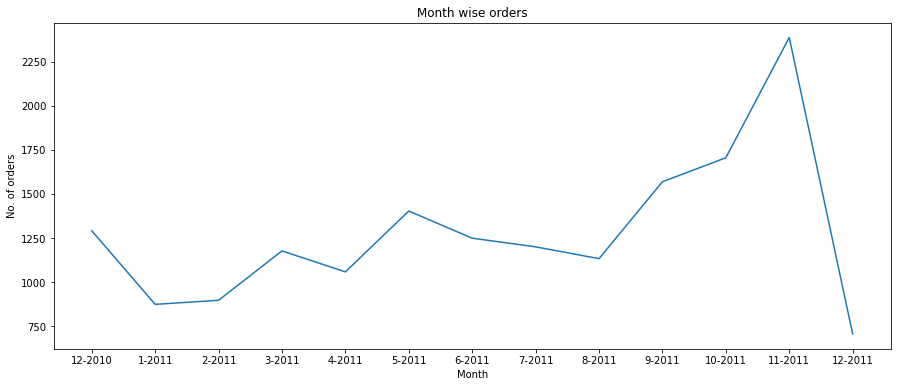

In [56]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg['Month-Year_wise'], df_month_agg['No. of orders'])
plt.xlabel('Month')
plt.ylabel('No. of orders')
plt.title('Month wise orders')
plt.savefig('Monthwise Order Summary.png')
plt.show()

Create Month wise Revenue plot(Line Plot)

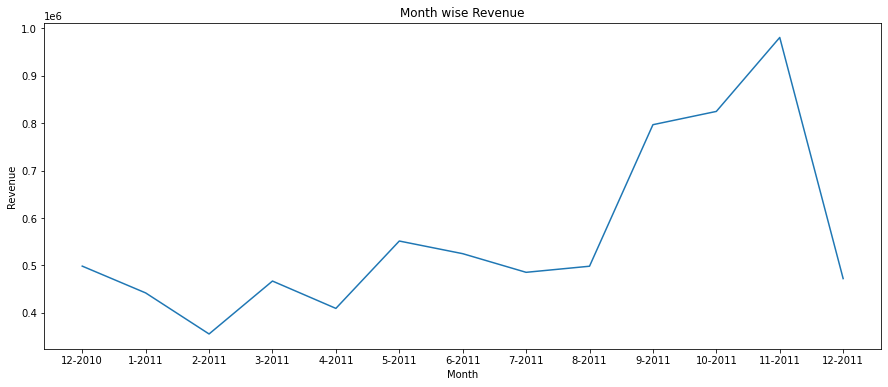

In [58]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg['Month-Year_wise'], df_month_agg['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Month wise Revenue')
plt.savefig('Monthwise Revenue Summary.png')
plt.show()

who is my recent customer called Recency

In [59]:
last_date = pd.datetime(2011, 12, 9)

C:\Users\iUsaid\AppData\Local\Temp/ipykernel_11444/1311570358.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  last_date = pd.datetime(2011, 12, 9)


In [60]:
last_date

datetime.datetime(2011, 12, 9, 0, 0)

In [74]:
df_recency = df.groupby('CustomerID', as_index=False).agg({'InvoiceDate' : 'max'})

# aaj ke din se customer ne kitne din phele order kara tha
df_recency['Recency'] = (last_date-df_recency['InvoiceDate']).dt.days
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,-1
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


In [76]:
df_recency['Recency'].replace([-1],[0], inplace=True)
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


Frequency-Monetry

In [77]:
df_FM = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo' : 'nunique',
                                                     'Revenue' : 'sum'})
df_FM

,CustomerID,InvoiceNo,Revenue
0,12346.0,1,77183.60
1,12747.0,11,4196.01
2,12748.0,210,33719.73
3,12749.0,5,4090.88
4,12820.0,4,942.34
...,...,...,...
3916,18280.0,1,180.60
3917,18281.0,1,80.82
3918,18282.0,2,178.05
3919,18283.0,16,2094.88


In [78]:
df_RFM = pd.merge(df_recency, df_FM, on='CustomerID', how='inner')
df_RFM

,CustomerID,InvoiceDate,Recency,InvoiceNo,Revenue
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60
3917,18281.0,2011-06-12 10:53:00,179,1,80.82
3918,18282.0,2011-12-02 11:43:00,6,2,178.05
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88


In [111]:
df_RFM.rename(columns={'InvoiceNo' : 'Freq.','Revenue':'Monitery'}, inplace=True)

In [112]:
df_RFM

,CustomerID,Recency,Freq.,Monetery
0,12346.0,324,1,77183.60
1,12747.0,1,11,4196.01
2,12748.0,0,210,33719.73
3,12749.0,2,5,4090.88
4,12820.0,2,4,942.34
...,...,...,...,...
3916,18280.0,276,1,180.60
3917,18281.0,179,1,80.82
3918,18282.0,6,2,178.05
3919,18283.0,2,16,2094.88


In [113]:
df_RFM.drop(columns='InvoiceDate')
df_RFM

KeyError: "['InvoiceDate'] not found in axis"

Modelling Data : RFM Quantities

Now we split the metric into segments using Quantities. We will asign scores from 1-4 to each frequency and monetary
respectively.

1 is the highest value and 4 is the lowest value.

Our final RFM score is calculated simply by combining individual RFM score.

In [114]:
Quantiles = df_RFM.quantile(q=[0.25, 0.5, 0.75])
Quantiles

,CustomerID,Recency,Freq.,Monetery
0.25,14208.0,16.0,1.0,300.04
0.50,15569.0,49.0,2.0,651.82
0.75,16913.0,141.0,5.0,1575.89


In [115]:
# starting these values in dictinary
Quantiles = Quantiles.to_dict()
Quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 141.0},
 'Freq.': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetery': {0.25: 300.04, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [116]:
Quantiles['Recency'][0.25]

16.0

In [117]:
#segmented_RFM = df_RFM.copy()
segmented_RFM

,CustomerID,Recency,Freq.,Monetery,Recency_quartile,Frequency_quartile,Monetary_quartile
0,12346.0,324,1,77183.60,4,4,1
1,12747.0,1,11,4196.01,1,1,1
2,12748.0,0,210,33719.73,1,1,1
3,12749.0,2,5,4090.88,1,2,1
4,12820.0,2,4,942.34,1,2,2
...,...,...,...,...,...,...,...
3916,18280.0,276,1,180.60,4,4,4
3917,18281.0,179,1,80.82,4,4,4
3918,18282.0,6,2,178.05,1,3,4
3919,18283.0,2,16,2094.88,1,1,1


In [118]:
def RScore(data, column, Quantiles):
    if data <= Quantiles[column][0.25]:
        return 1
    elif data <= Quantiles[column][0.50]:
        return 2
    elif data <= Quantiles[column][0.75]:
        return 3
    else:
        return 4
    
def FMScore(data, column, Quantiles):
    if data <= Quantiles[column][0.25]:
        return 4
    elif data <= Quantiles[column][0.50]:
        return 3
    elif data <= Quantiles[column][0.75]:
        return 2
    else:
        return 1

In [119]:
# apply - evertime we have a sequence list, array, series, pd columns
# and we want to apply a function in each elemnet of sequence

segmented_RFM['Recency_quartile'] = segmented_RFM['Recency'].apply(RScore, args=('Recency', Quantiles))

segmented_RFM['Frequency_quartile'] = segmented_RFM['Freq.'].apply(FMScore, args=('Freq.', Quantiles))

segmented_RFM['Monetary_quartile'] = segmented_RFM['Monetery'].apply(FMScore, args=('Monetery', Quantiles))
segmented_RFM.head(3)

,CustomerID,Recency,Freq.,Monetery,Recency_quartile,Frequency_quartile,Monetary_quartile
0,12346.0,324,1,77183.60,4,4,1
1,12747.0,1,11,4196.01,1,1,1
2,12748.0,0,210,33719.73,1,1,1


In [120]:
segmented_RFM['RFM_Score'] = (segmented_RFM['Recency_quartile'].map(str)+
                             segmented_RFM['Frequency_quartile'].map(str)+
                             segmented_RFM['Monetary_quartile'].map(str))

In [121]:
segmented_RFM

,CustomerID,Recency,Freq.,Monetery,Recency_quartile,Frequency_quartile,Monetary_quartile,RFM_Score
0,12346.0,324,1,77183.60,4,4,1,441
1,12747.0,1,11,4196.01,1,1,1,111
2,12748.0,0,210,33719.73,1,1,1,111
3,12749.0,2,5,4090.88,1,2,1,121
4,12820.0,2,4,942.34,1,2,2,122
...,...,...,...,...,...,...,...,...
3916,18280.0,276,1,180.60,4,4,4,444
3917,18281.0,179,1,80.82,4,4,4,444
3918,18282.0,6,2,178.05,1,3,4,134
3919,18283.0,2,16,2094.88,1,1,1,111


In [123]:
# count of best customers
segmented_RFM[segmented_RFM['RFM_Score']=="111"].shape[0]

423

In [124]:
print('Best Customer : ', segmented_RFM[segmented_RFM['RFM_Score']=="111"].shape[0])
print('Loyal/frequent Customer : ', segmented_RFM[segmented_RFM['Frequency_quartile']==1].shape[0])
print('High Spending Customer : ', segmented_RFM[segmented_RFM['Monetary_quartile']==1].shape[0])
print('Almost lost Customer : ', segmented_RFM[segmented_RFM['RFM_Score']=="134"].shape[0])
print('Lost Customer : ', segmented_RFM[segmented_RFM['RFM_Score']=="334"].shape[0])
print('Old and Low spending Customer : ', segmented_RFM[segmented_RFM['RFM_Score']=="444"].shape[0])

Best Customer :  423
Loyal/frequent Customer :  791
High Spending Customer :  980
Almost lost Customer :  31
Lost Customer :  35
Old and Low spending Customer :  396


In [125]:
Label = [0]*len(segmented_RFM)
Label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [127]:
for i in range(0, len(segmented_RFM)):
    
    if segmented_RFM['RFM_Score'][i]=='111':
        Label[i]='Best Customer'    
    elif segmented_RFM['RFM_Score'][i]=='134':
        Label[i]='Almost Lost Customer'
    elif segmented_RFM['RFM_Score'][i]=='344':
        Label[i]='Lost Customer'
    elif segmented_RFM['RFM_Score'][i]=='444':
        Label[i]='bad-lost Customer'
        
    elif segmented_RFM['Frequency_quartile'][i]==1:
        Label[i]='Loyal Customer'
    elif segmented_RFM['Monetary_quartile'][i]==1:
        Label[i]='Big spenders Customer'
    else:
        Label[i]='Others'

In [128]:
segmented_RFM['category']=Label
segmented_RFM.category.value_counts()

Others                   2203
Best Customer             423
bad-lost Customer         396
Loyal Customer            368
Big spenders Customer     313
Lost Customer             187
Almost Lost Customer       31
Name: category, dtype: int64

In [129]:
import seaborn as sns

In [130]:
Cust_df = segmented_RFM.groupby('category')['CustomerID'].nunique()

In [131]:
Cust_df = Cust_df.sort_values(ascending=False).reset_index()
Cust_df

,category,CustomerID
0,Others,2203
1,Best Customer,423
2,bad-lost Customer,396
3,Loyal Customer,368
4,Big spenders Customer,313
5,Lost Customer,187
6,Almost Lost Customer,31


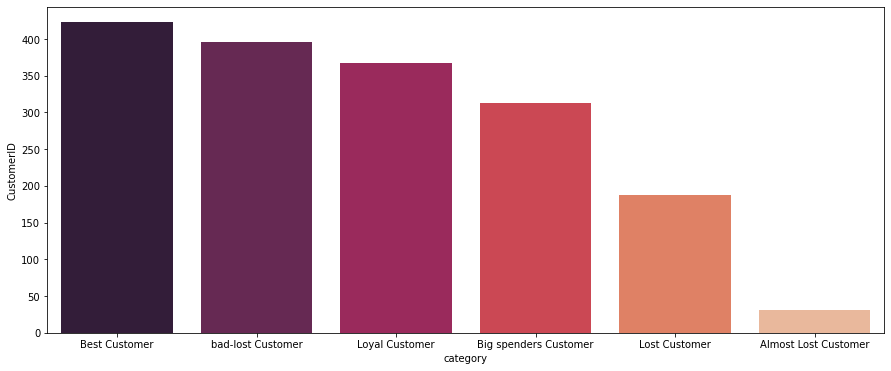

In [132]:
plt.figure(figsize=(15,6))
sns.barplot(data=Cust_df.drop([0]), x='category', y='CustomerID', palette='rocket')
plt.savefig('Customers_Category.png')